In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
vectorizer = TfidfVectorizer()

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('open_ave_data.csv')

In [4]:
examname = data['ExamName']
clinical = data['clinicaldata'].dropna()
findings = data['findings']
impression = data['impression']

corpus = []
corpus = np.append(corpus,examname)
corpus = np.append(corpus,clinical)
corpus = np.append(corpus,findings)
corpus = np.append(corpus,impression)
corpus.shape

(3812,)

In [5]:
#Vectorizing different sections of report

X = vectorizer.fit_transform(corpus)

In [6]:
vectorizer.get_feature_names_out()


array(['00', '01', '02', ..., 'your', 'zip', 'zone'], dtype=object)

In [7]:
X.shape

(3812, 1083)

In [8]:
X.toarray()

array([[0.        , 0.32614224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
from sklearn.manifold import TSNE

In [10]:
import matplotlib.pyplot as plt

In [11]:
#Create embeddings in 2d space

X_embed = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

In [12]:
X_embed

array([[  9.797278, -47.059387],
       [-15.486935, -27.821579],
       [  6.338742, -31.642523],
       ...,
       [ 29.407705, -20.201946],
       [ 96.562836,  20.233921],
       [-50.4184  , -20.686443]], dtype=float32)

In [13]:
examname.shape, clinical.shape, 954+950

((954,), (950,), 1904)

In [14]:
findings.shape, 1904+954

((954,), 2858)

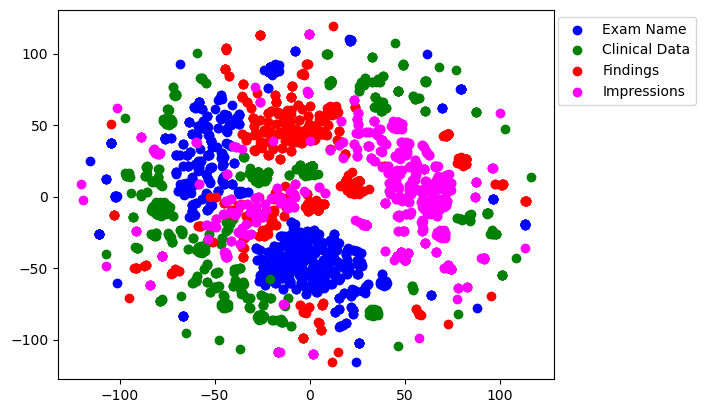

In [15]:
#Exam Name in blue
plt.scatter(X_embed[0:954,0],X_embed[0:954,1],c='blue',label='Exam Name')

#Clinical data in green
plt.scatter(X_embed[954:1904,0],X_embed[954:1904,1],c='green',label='Clinical Data')

#Findings in red
plt.scatter(X_embed[1904:2858,0],X_embed[1904:2858,1],c='red',label='Findings')

#And Impressions in magenta
plt.scatter(X_embed[2858:,0],X_embed[2858:,1],c='magenta', label='Impressions')

plt.legend(loc='best', bbox_to_anchor=(.8, .5, 0.5, 0.5))

Exam Name and Impressions have two main clusters, suggesting two main types of exams and two main impressions (good and bad). Clinical data is more variable but this reflects the various medical histories patients have. Findings has one main cluster, one of which overlaps with a main impression cluster. This reflects the relation between impressions and findings from the exam.

In [16]:
%store X

Stored 'X' (csr_matrix)
